In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

## load Data

In [2]:
data=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## data exploration

In [3]:
data.describe(include='number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
print("أول index:", data.index.min())
print("آخر index:", data.index.max())
print("عدد الصفوف:", len(data))


أول index: 0
آخر index: 613
عدد الصفوف: 614


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 

In [6]:
round(data.isna().mean()*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

## data cleanning 

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.drop('Loan_ID',axis=1,inplace=True)

## check for categorical col

In [9]:
cat_cols=data.select_dtypes(include='O').columns
cat_cols


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
for col in cat_cols:
    print(col)
    print(data[col].nunique())
    print(data[col].unique())
    print('\n','*'*100,'\n')

Gender
2
['Male' 'Female' nan]

 **************************************************************************************************** 

Married
2
['No' 'Yes' nan]

 **************************************************************************************************** 

Dependents
4
['0' '1' '2' '3+' nan]

 **************************************************************************************************** 

Education
2
['Graduate' 'Not Graduate']

 **************************************************************************************************** 

Self_Employed
2
['No' 'Yes' nan]

 **************************************************************************************************** 

Property_Area
3
['Urban' 'Rural' 'Semiurban']

 **************************************************************************************************** 

Loan_Status
2
['Y' 'N']

 **************************************************************************************************** 



In [11]:
# قيم الnull مش معدبه ال6 في الميه ممكن اعوض بالmode عادي 
(data[cat_cols].isna().sum() / len(data)) * 100


Gender           2.117264
Married          0.488599
Dependents       2.442997
Education        0.000000
Self_Employed    5.211726
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64

In [12]:
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\AD\AppData\Local\Temp\ipykernel_21292\1194294401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [13]:
(data[cat_cols].isna().sum() / len(data)) * 10

Gender           0.0
Married          0.0
Dependents       0.0
Education        0.0
Self_Employed    0.0
Property_Area    0.0
Loan_Status      0.0
dtype: float64

## numerical_col

In [14]:
num_cols=data.select_dtypes(include='number').columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

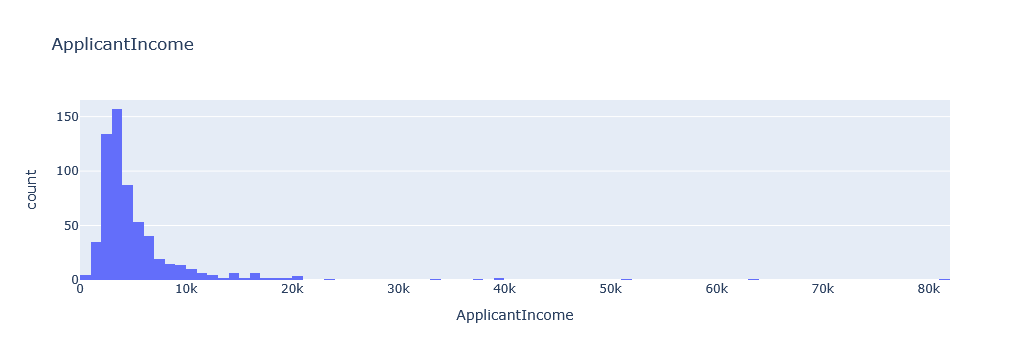

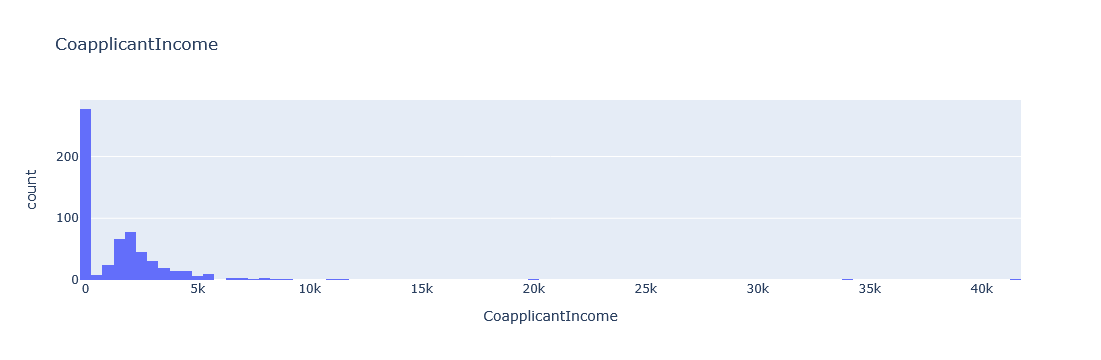

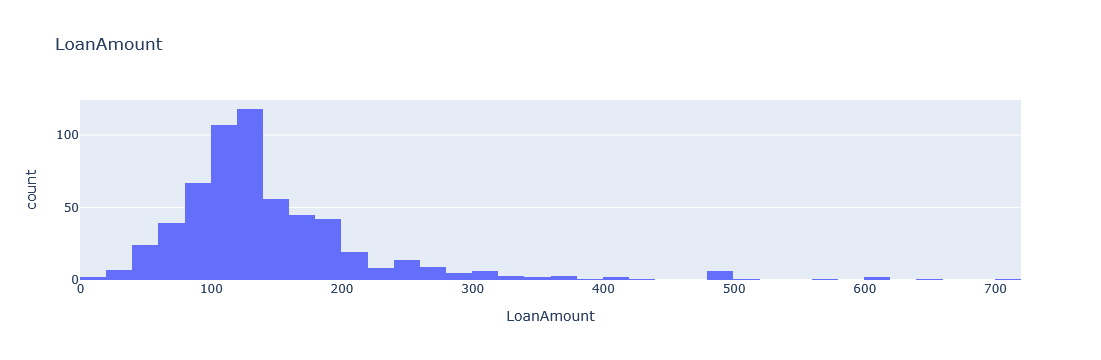

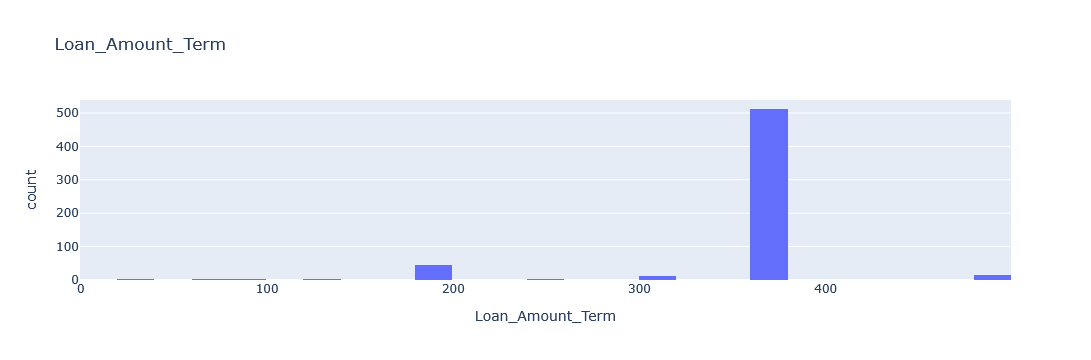

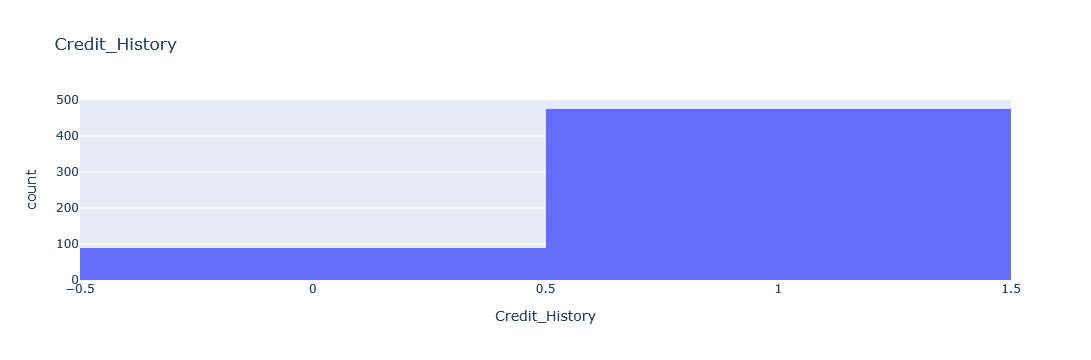

In [15]:
for col in num_cols:
    px.histogram(data,x=col,title=col).show()

## 

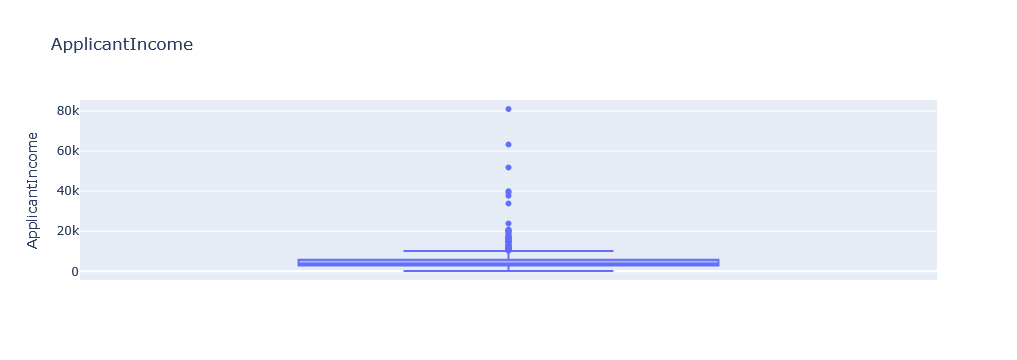

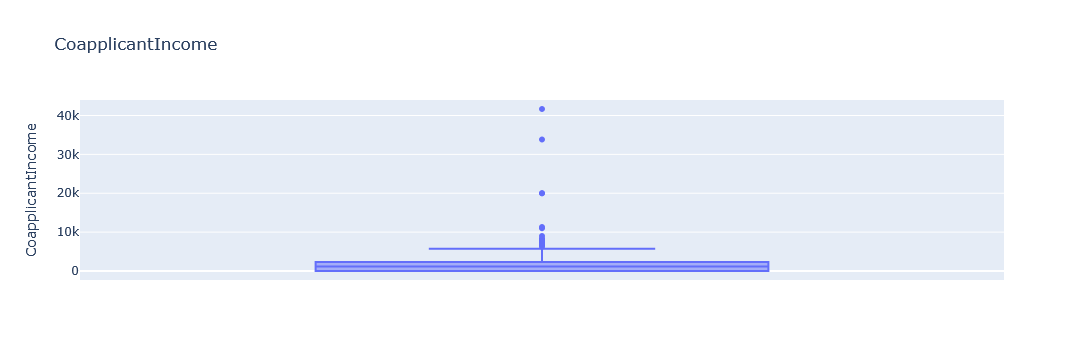

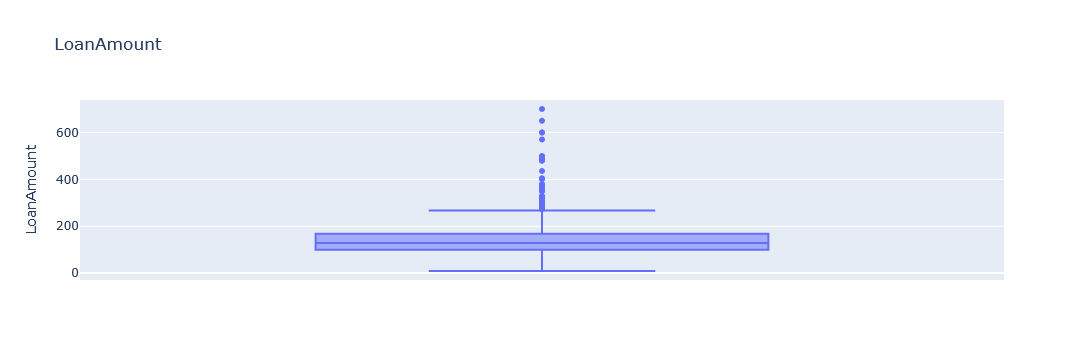

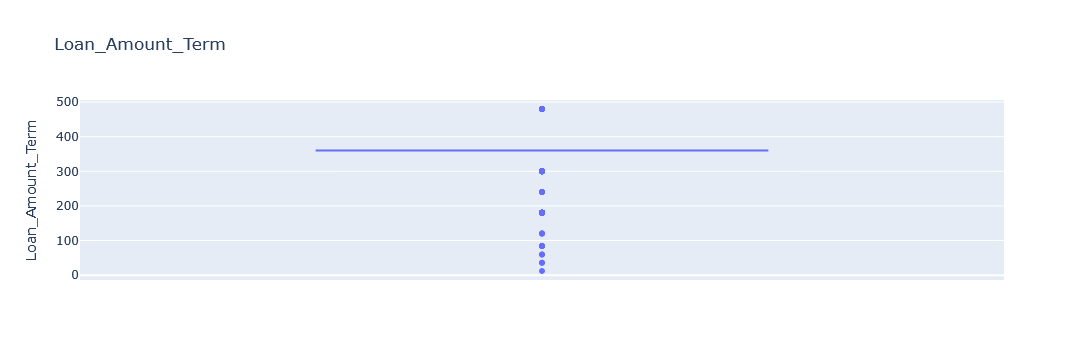

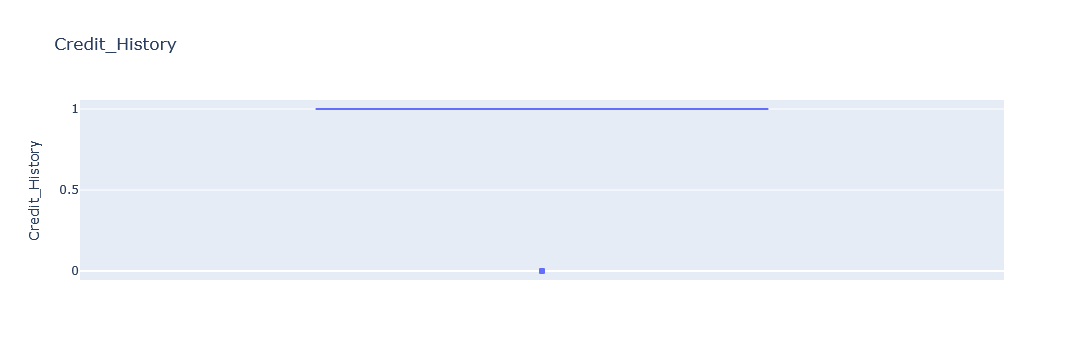

In [16]:
for col in num_cols:
    px.box(data,y=col,title=col).show()

In [17]:
(data[num_cols].isna().sum() / len(data)) * 10

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.358306
Loan_Amount_Term     0.228013
Credit_History       0.814332
dtype: float64

In [18]:
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(data[col].median(),inplace=True)
    

C:\Users\AD\AppData\Local\Temp\ipykernel_21292\345551990.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\AD\AppData\Local\Temp\ipykernel_21292\345551990.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [19]:
(data[num_cols].isna().sum() / len(data)) * 10

ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
dtype: float64

## encoding and spliting 

In [20]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [23]:
for col in data:
    print([col])
    print(data[col].nunique())
    print(data[col].unique())
    print('\n','*'*100,'\n')

['Gender']
2
['Male' 'Female']

 **************************************************************************************************** 

['Married']
2
['No' 'Yes']

 **************************************************************************************************** 

['Dependents']
4
['0' '1' '2' '3+']

 **************************************************************************************************** 

['Education']
2
['Graduate' 'Not Graduate']

 **************************************************************************************************** 

['Self_Employed']
2
['No' 'Yes']

 **************************************************************************************************** 

['ApplicantIncome']
505
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821 

In [24]:
from sklearn.preprocessing  import OneHotEncoder
cat_cols=['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Credit_History', 'Property_Area']
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_train_enc=ohe.fit_transform(x_train[cat_cols])
x_test_enc= ohe.transform(x_test[cat_cols])

In [25]:
x_train_enc=pd.DataFrame(
    x_train_enc,columns=ohe.get_feature_names_out(cat_cols),index=x_train.index
)
x_train_enc

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
90,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
227,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
482,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
71,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
106,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [26]:
x_test_enc=pd.DataFrame(
    x_test_enc,columns=ohe.get_feature_names_out(cat_cols),index=x_test.index
)
x_test_enc

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
350,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
377,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
163,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
231,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
248,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [27]:
x_train=pd.concat([x_train.drop(columns=cat_cols),x_train_enc],axis=1)
x_test=pd.concat([x_test.drop(columns=cat_cols),x_test_enc],axis=1)

In [28]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
83,6000,2250.0,265.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
90,2958,2900.0,131.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
227,6250,1695.0,210.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
482,2083,3150.0,128.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
464,4166,0.0,98.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1875,1875.0,97.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
106,11417,1126.0,225.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
270,3237,0.0,30.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
435,10047,0.0,128.0,240.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [30]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
x_train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Gender_Male                float64
Married_Yes                float64
Dependents_1               float64
Dependents_2               float64
Dependents_3+              float64
Education_Not Graduate     float64
Self_Employed_Yes          float64
Credit_History_1.0         float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

In [32]:
y_train.nunique()

2

In [33]:
y_train=y_train.map({'Y':1,'N':0})
y_test=y_test.map({'Y':1,'N':0})

In [34]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])

<Axes: >

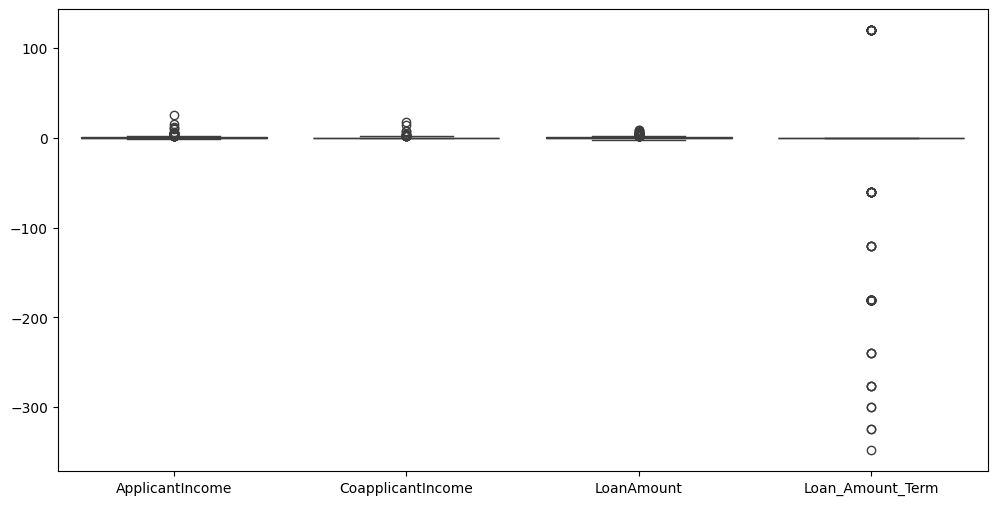

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=x_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

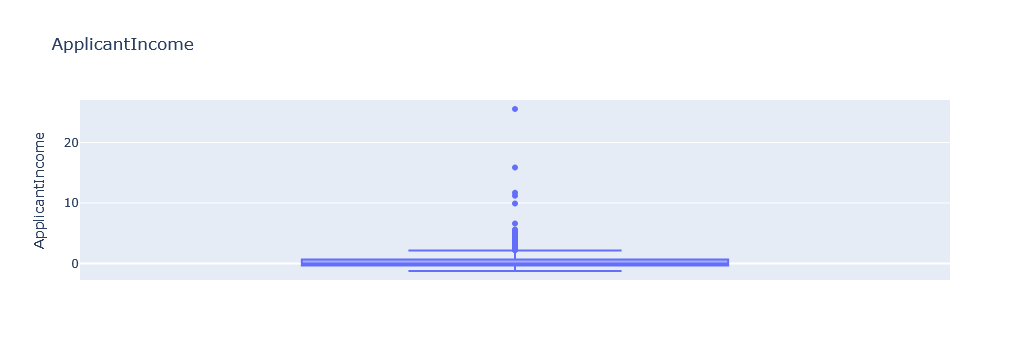

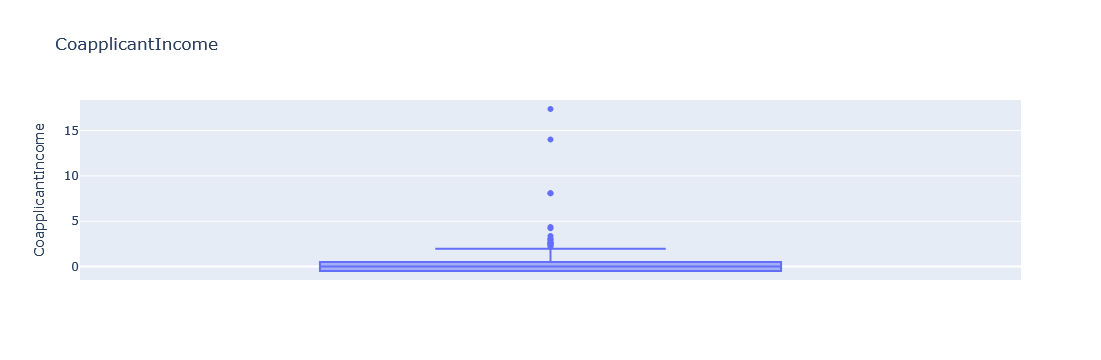

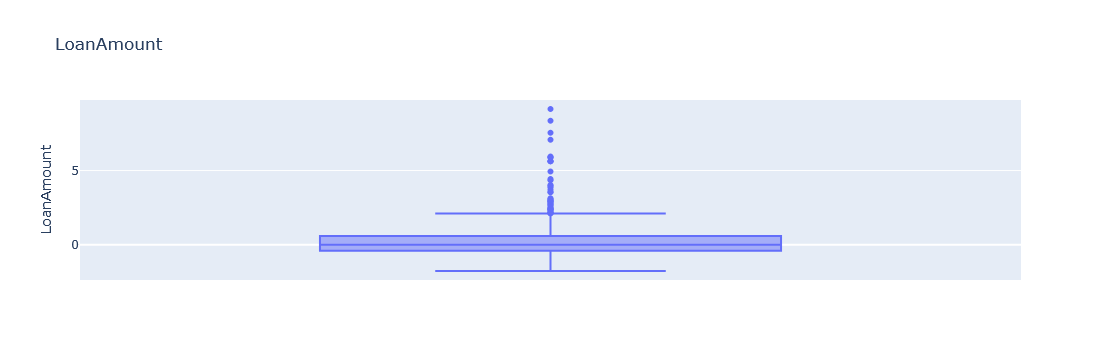

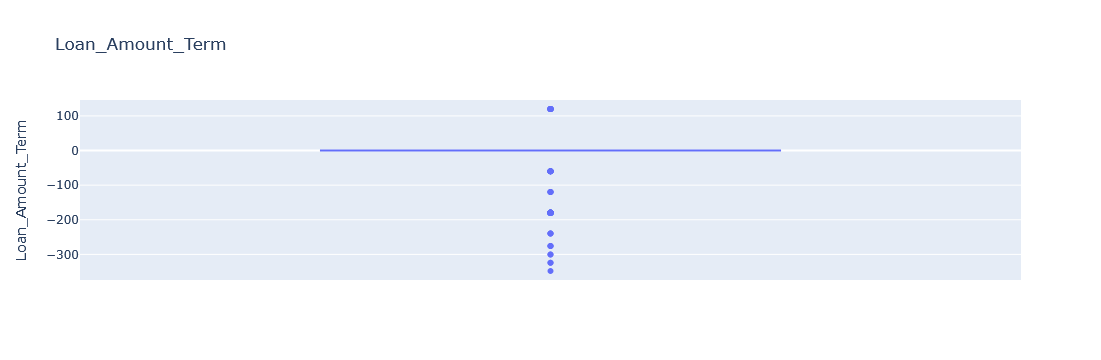

In [36]:
import plotly.express as px

for col in num_cols:
    px.box(x_train, y=col, points='outliers', title=col).show()


In [37]:
print(y_train.value_counts(normalize=True))

Loan_Status
1    0.696538
0    0.303462
Name: proportion, dtype: float64


In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_res,y_train_res =smote.fit_resample(x_train,y_train)
print("before:", y_train.value_counts(normalize=True))
print("after:", y_train_res.value_counts(normalize=True))


before: Loan_Status
1    0.696538
0    0.303462
Name: proportion, dtype: float64
after: Loan_Status
0    0.5
1    0.5
Name: proportion, dtype: float64


In [39]:
data['Loan_Amount_Term'].describe()
print(data['Loan_Amount_Term'].unique())
print(data[data['Loan_Amount_Term'] < 0])


[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42)
log_reg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


0.7479674796747967
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.78      0.86      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.74      0.75      0.74       123



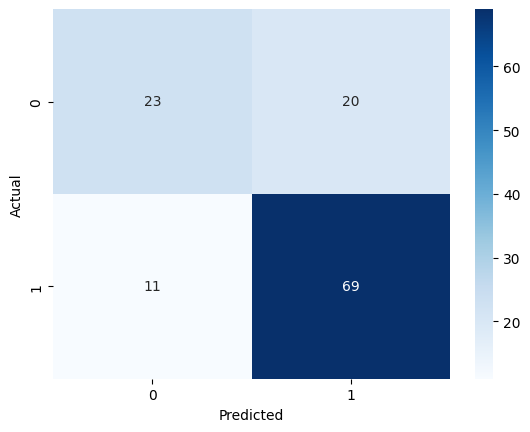

In [63]:
y_pred=log_reg.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## logisticRegression with Smote

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1- تعريف الموديل
log_reg = LogisticRegression(max_iter=1000,random_state=42)

# 2- تدريب الموديل على البيانات بعد SMOTE
log_reg.fit(X_train_res, y_train_res)

# 3- التوقع على test set (الأصلية)
y_pred = log_reg.predict(x_test)

# 4- حساب الدقة
print("Accuracy:", accuracy_score(y_test, y_pred))

# 5- تقرير كامل
print(classification_report(y_test, y_pred))


Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.78      0.86      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.74      0.75      0.74       123



## RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('RandomForest Score:',score)
print(classification_report(y_test,y_pred))


RandomForest Score: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



## RandomFOrest with Smote

In [72]:
rf_smote=RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_res, y_train_res)
y_pred_smote=rf_smote.predict(x_test)
score=accuracy_score(y_test,y_pred_smote)
print('random forest with smote ',score)
print(classification_report(y_test,y_pred))

random forest with smote  0.7235772357723578
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_bal = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_bal.fit(x_train, y_train)
y_pred_bal = rf_bal.predict(x_test)

print("RandomForest Balanced Score:", rf_bal.score(x_test, y_test))
print(classification_report(y_test, y_pred_bal))


RandomForest Balanced Score: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [75]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))


Balanced Accuracy: 0.6968023255813953
ROC-AUC: 0.7563953488372093
